In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts import claim, eval, display, stats
from scripts.constants import Constants

experiments_path = os.path.abspath(os.path.expandvars("$GITHUB_HOME/claim-extraction/experiments"))

test_index = 1
dataset_name = "cs_dataset"
json_tables = "CS_Dataset.json"

tables_file_path = os.path.join(experiments_path, Constants.EXTRACTED_TABLE_DIR, json_tables)

dataset_path = os.path.join(experiments_path, Constants.OUTPUT_DIR, dataset_name, str(test_index))
ground_truth_path = os.path.join(experiments_path, Constants.GROUND_TRUTH_DIR)

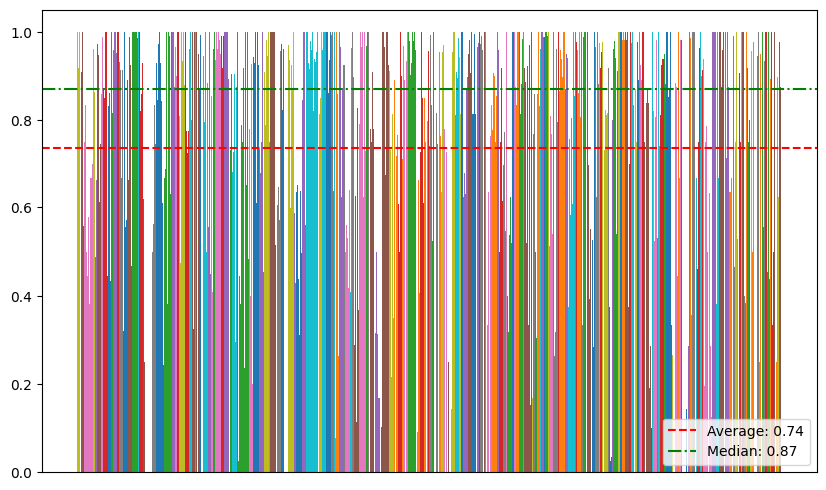

# of Tables: 1244


In [2]:
d_results = eval.evaluate_extracted_articles(tables_file_path, dataset_path, False, False)

display.plot_grouped_bars(d_results)

print(f"# of Tables: {len(d_results)}")

Data Tables Coverage Results - # Tables: 434


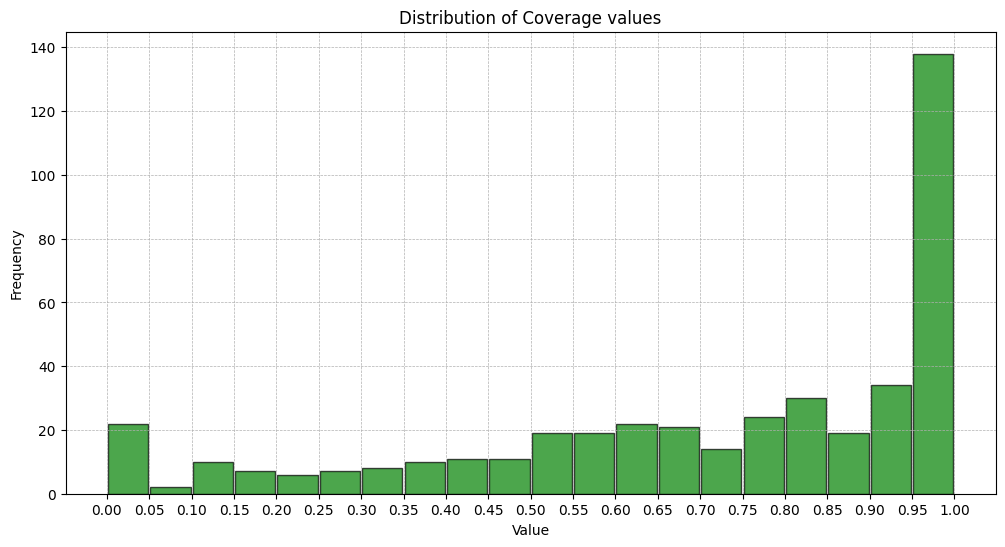

Outcome Tables Coverage Results - # Tables: 739


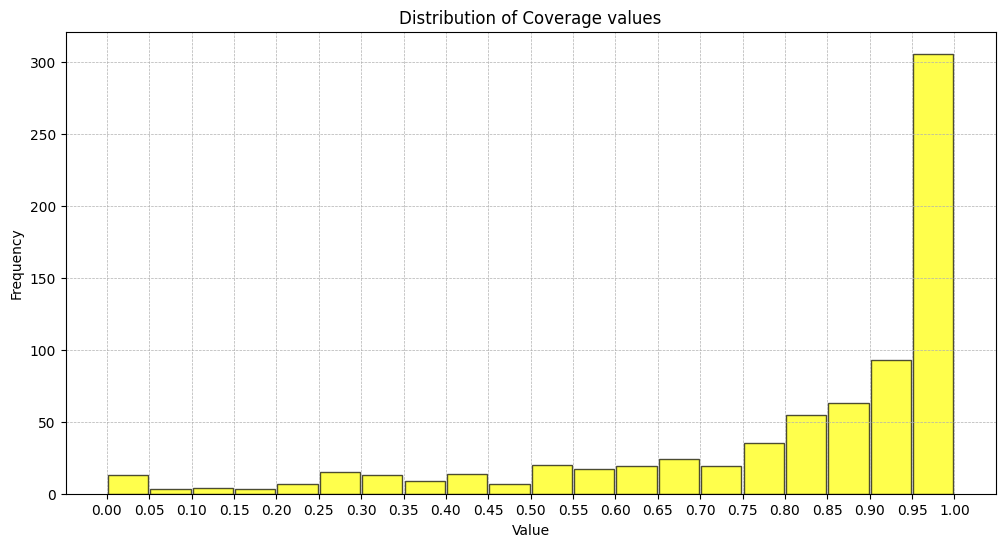

All Correct Tables Coverage Results - # Tables 1173


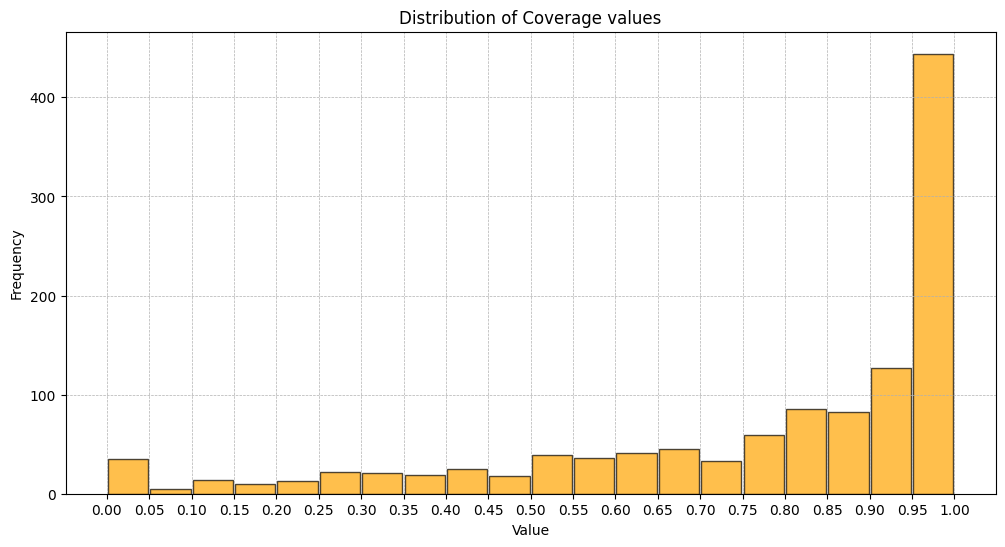

Bad Extractions: 71/1244 - 0.0571


In [3]:
outcome_claims, data_claims, wrong_claims = stats.get_claim_types(dataset_path)

outcome_results = [x for x in d_results if x[0] in outcome_claims]
data_results = [x for x in d_results if x[0] in data_claims]

all_results = outcome_results + data_results

num_wrong_claims = len(wrong_claims)
num_good_claims = len(all_results)

print(f"Data Tables Coverage Results - # Tables: {len(data_results)}")
display.plot_value_distribution(data_results, color="green")

print(f"Outcome Tables Coverage Results - # Tables: {len(outcome_results)}")
display.plot_value_distribution(outcome_results, color="yellow")

print(f"All Correct Tables Coverage Results - # Tables {num_good_claims}")
display.plot_value_distribution(all_results)

ratio = "{:.4f}".format(num_wrong_claims/(num_wrong_claims + num_good_claims))
print(f"Bad Extractions: {num_wrong_claims}/{num_good_claims + num_wrong_claims} - {ratio}")

In [4]:
article_id = "1711.07424"
table_idx = "1"

table_claims = claim.extract_table_answers(os.path.join(ground_truth_path, Constants.LLM_ANSWER_DIR, f"{article_id}_{table_idx}" + ".txt"))

display.print_table_claims(0, table_claims)

	Table Index: 0
		Extracted Claims:
			specifications:
				Region: GB vs RW,
				Region Number: 1,
			measure: Relative Efficiency (ESS/time)
			outcome: 0.8


			specifications:
				Region: GB vs RW,
				Region Number: 2,
			measure: Relative Efficiency (ESS/time)
			outcome: 2.9


			specifications:
				Region: GB vs RW,
				Region Number: 3,
			measure: Relative Efficiency (ESS/time)
			outcome: 0.7


			specifications:
				Region: GB vs RW,
				Region Number: 4,
			measure: Relative Efficiency (ESS/time)
			outcome: 1.7


			specifications:
				Region: GB vs RW,
				Region Number: 5,
			measure: Relative Efficiency (ESS/time)
			outcome: 1.4


			specifications:
				Region: GB vs RW,
				Region Number: 6,
			measure: Relative Efficiency (ESS/time)
			outcome: 0.5


			specifications:
				Region: GB vs RW,
				Region Number: 7,
			measure: Relative Efficiency (ESS/time)
			outcome: 1.0


			specifications:
				Region: GB vs RW,
				Region Number: 8,
			measure: Relative Efficiency (

In [5]:
similarities, pd_table, unique_values_extracted, claim_dict = eval.evaluate_extracted_article(tables_file_path, dataset_path, article_id, table_idx)

pd_table

,Region,1,2,3,4,5,6,7,8,Average
0,GB vs RW,0.8,2.9,0.7,1.7,1.4,0.5,1.0,0.9,0.94
1,LB vs RW,60.6,209.0,36.2,127.0,48.9,104.0,172.0,33.3,94.00
2,HB vs RW,6.3,20.3,3.7,15.3,7.2,10.9,15.6,3.1,9.96
